In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [ ]:
df['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


In [ ]:
print("Average score by Gender")
print(df.groupby('gender')[['math score','reading score','writing score']].mean())


Average score by Gender
        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


In [ ]:
print('Average scores by lunch')
print(df.groupby('lunch')[['math score','reading score','writing score']].mean())

Average scores by lunch
              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


In [ ]:
groups=df.groupby('gender')['math score']
for g,values in groups:
  print(f'\nMath average for {g}:{np.mean(values)}')


Math average for female:63.633204633204635

Math average for male:68.72821576763485


In [ ]:
print('Correlation matrix :\n',df.select_dtypes(include=[np.number]).corr())

Correlation matrix :
                math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [ ]:
print('Math score percentiles (25,50,75):',np.percentile(df['math score'],[25,50,75]))

Math score percentiles (25,50,75): [57. 66. 77.]


In [ ]:
print('Reading score percentiles (25,50,75):',np.percentile(df['reading score'],[25,50,75]))

Reading score percentiles (25,50,75): [59. 70. 79.]


In [ ]:
print('writing score percentiles (25,50,75):',np.percentile(df['reading score'],[25,50,75]))

writing score percentiles (25,50,75): [59. 70. 79.]


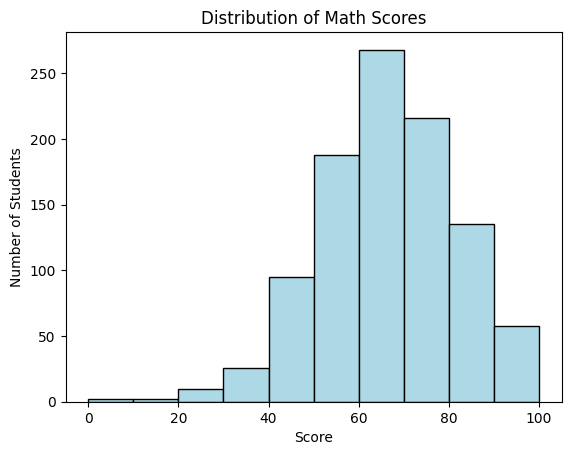

In [ ]:
plt.hist(df["math score"], bins=10, color="lightblue", edgecolor="black")
plt.title("Distribution of Math Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.show()


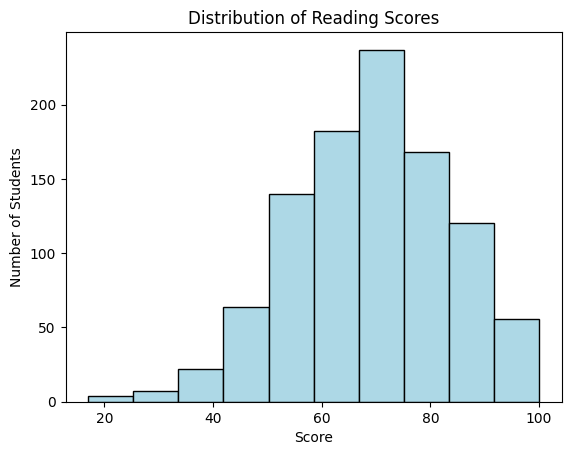

In [ ]:
plt.hist(df["reading score"], bins=10, color="lightblue", edgecolor="black")
plt.title("Distribution of Reading Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.show()

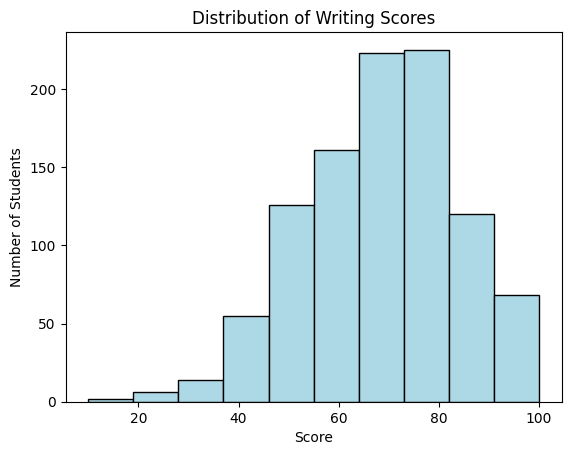

In [ ]:
plt.hist(df["writing score"], bins=10, color="lightblue", edgecolor="black")
plt.title("Distribution of Writing Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.show()

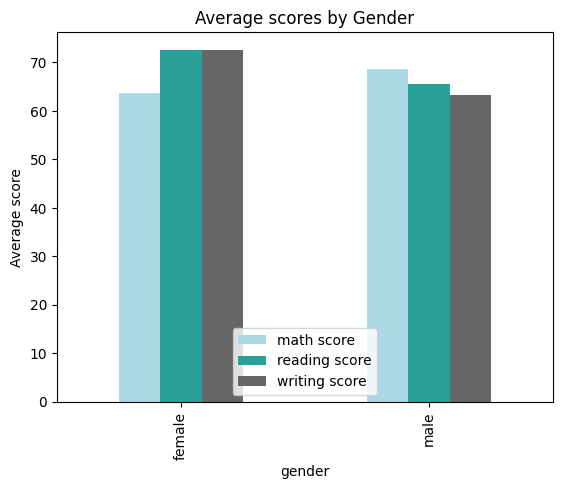

In [ ]:
df.groupby('gender')[['math score','reading score','writing score']].mean().plot(kind='bar',title='Average scores by Gender',color=['lightblue', '#2AA198', '#666666'])
plt.ylabel('Average score')
plt.show()

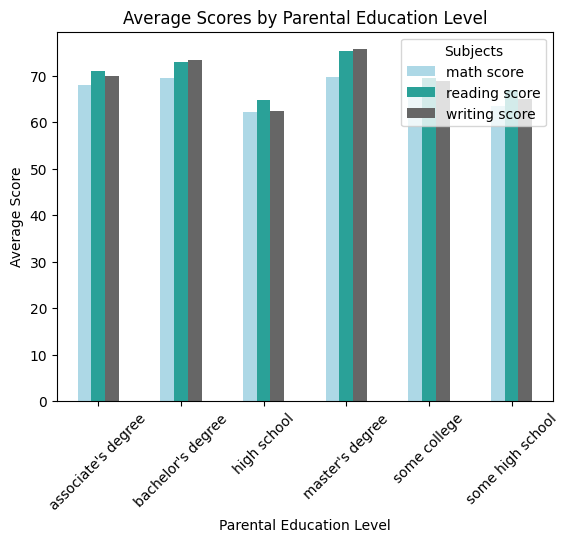

In [ ]:

parent_means = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()
parent_means.plot(kind="bar",color=['lightblue', '#2AA198', '#666666'])
plt.title("Average Scores by Parental Education Level")
plt.ylabel("Average Score")
plt.xlabel("Parental Education Level")
plt.xticks(rotation=45)
plt.legend(title="Subjects")
plt.show()


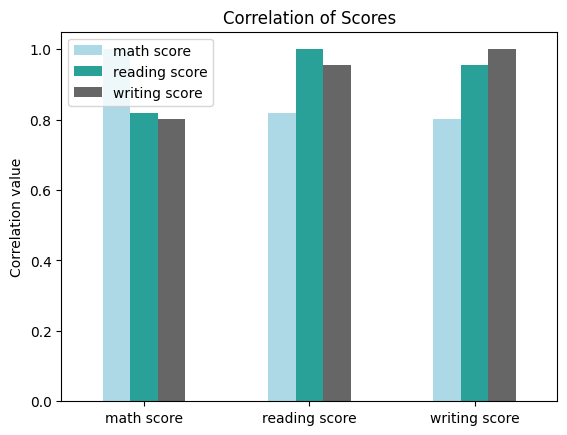

In [ ]:
df.select_dtypes(include=[np.number]).corr().plot(kind='bar',title='Correlation of Scores',color=['lightblue', '#2AA198', '#666666'])
plt.ylabel('Correlation value')
plt.xticks(rotation=0)
plt.show()

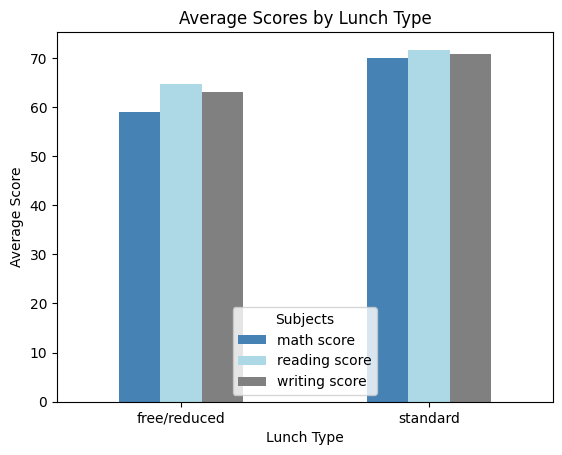

In [ ]:
lunch_means = df.groupby("lunch")[["math score", "reading score", "writing score"]].mean()
lunch_means.plot(kind="bar",  color=["steelblue", "lightblue", "grey"])
plt.title("Average Scores by Lunch Type")
plt.ylabel("Average Score")
plt.xlabel("Lunch Type")
plt.xticks(rotation=0)
plt.legend(title="Subjects")
plt.show()

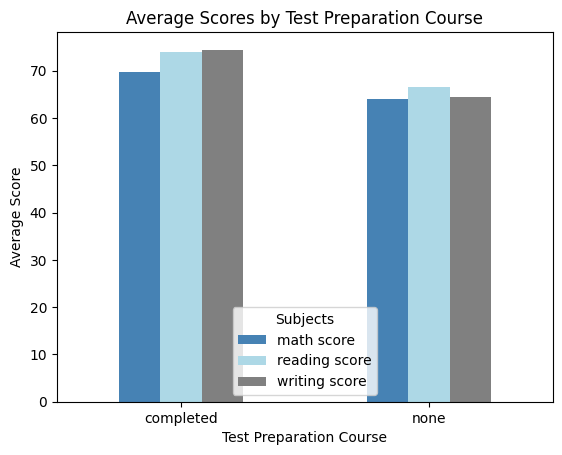

In [ ]:
prep_means = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
prep_means.plot(kind="bar", color=["steelblue", "lightblue", "grey"])
plt.title("Average Scores by Test Preparation Course")
plt.ylabel("Average Score")
plt.xlabel("Test Preparation Course")
plt.xticks(rotation=0)
plt.legend(title="Subjects")
plt.show()